In [33]:
import numpy as np
import pandas as pd
import io
from google.colab import files

In [34]:
uploaded=files.upload()

Saving testcloud3.csv to testcloud3.csv


In [35]:
str1=uploaded['testcloud3.csv']

In [36]:
s=str1.decode('utf-8')

In [37]:
t=s.split()

In [38]:
ord_x=np.array([float(i) for i in t[5::5]])
ord_y=np.array([float(i) for i in t[6::5]])
ord_z=np.array([float(i) for i in t[7::5]])
X=[[x,y,z] for x,y,z in zip(ord_x,ord_y,ord_z)]
print(X[1])
print(max(ord_x))
print(max(ord_y))
print(max(ord_z))
print(min(ord_x))
print(min(ord_y))
print(min(ord_z))
print(len(ord_x))

[245.29225159, 277.41674805, 17.84600067]
245.52749634
279.414505
36.32699966
156.73824978
179.5284996
-0.68375
42279


In [39]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

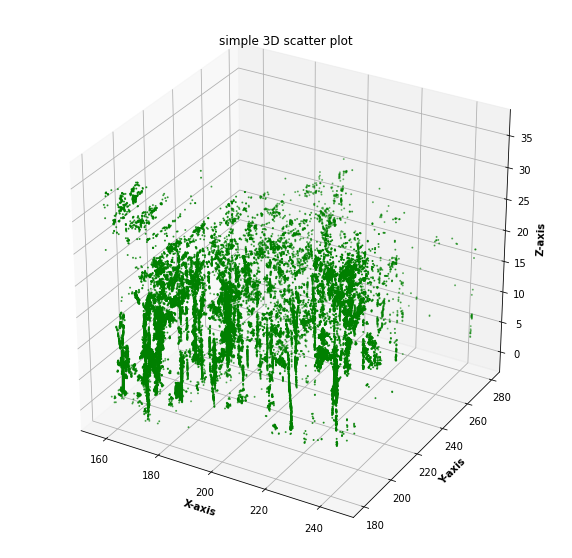

In [40]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(ord_x, ord_y, ord_z, color = "green",s=1)
plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

 
# show plot
plt.show()

In [41]:
from sklearn.cluster import DBSCAN


In [42]:
eps,min_samples=.5,10
dbscan=DBSCAN(eps=eps,min_samples=min_samples)
model=dbscan.fit(X)
labels=model.labels_

Text(0.5, 0.92, 'DBSCAN: eps=0.5 min_samples=10')

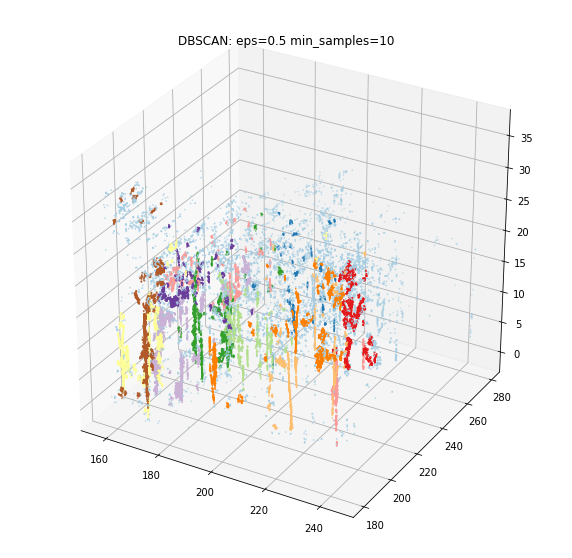

In [43]:
y_pred = dbscan.fit_predict(X)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(ord_x,ord_y,ord_z,c=y_pred, cmap='Paired',s=.5)
plt.title("DBSCAN: eps="+str(eps)+" min_samples="+str(min_samples))

In [44]:
ord_x=[i for j,i in zip(ord_z,ord_x) if j>=1 and j<=3]
ord_y=[i for j,i in zip(ord_z,ord_y) if j>=1 and j<=3]
ord_z=[i for i in ord_z if i>=1 and i<=3]
X=[[x,y] for x,y,z in zip(ord_x,ord_y,ord_z)]
print(len(ord_x))
print(len(ord_y))
print(len(ord_z))
print(len(X))


1244
1244
1244
1244


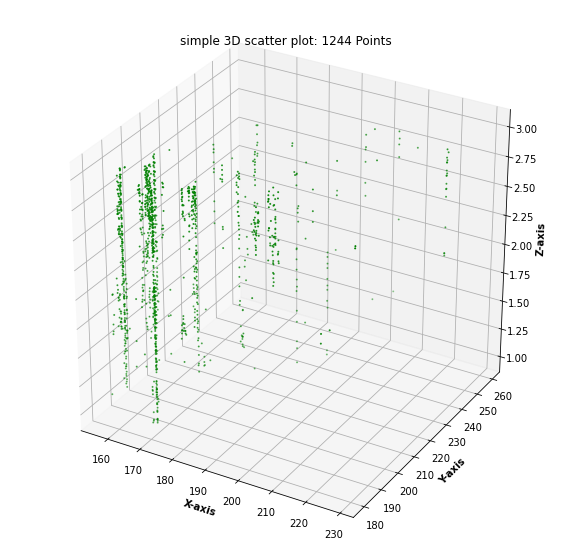

In [45]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(ord_x, ord_y, ord_z, color = "green",s=1)
plt.title("simple 3D scatter plot: " +str(len(ord_x))+" Points")
ax.set_xlabel('X-axis', fontweight ='bold') 
ax.set_ylabel('Y-axis', fontweight ='bold') 
ax.set_zlabel('Z-axis', fontweight ='bold')

 
# show plot
plt.show()

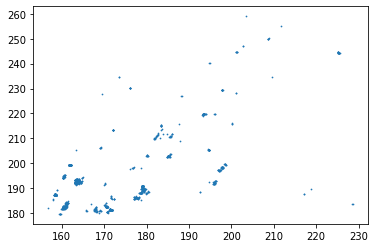

In [46]:
plt.scatter(ord_x, ord_y,s=.5)

In [47]:
eps,min_samples=.5,10
dbscan=DBSCAN(eps=eps,min_samples=min_samples)
model=dbscan.fit(X)
labels=model.labels_

Text(0.5, 0.92, 'DBSCAN: eps=0.5 min_samples=10')

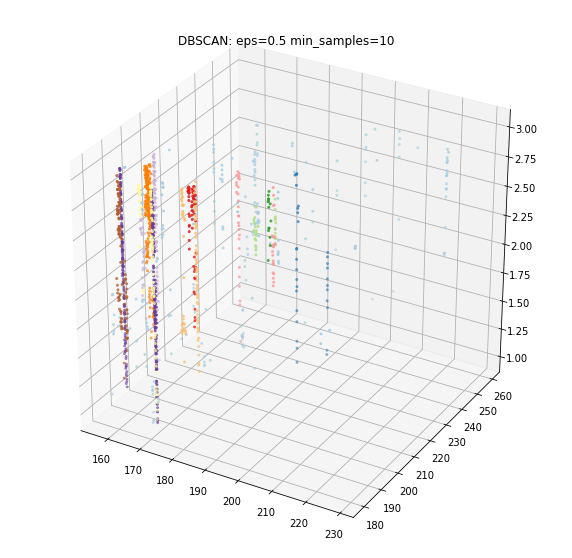

In [48]:
y_pred = dbscan.fit_predict(X)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(ord_x,ord_y,ord_z,c=y_pred, cmap='Paired',s=4)
plt.title("DBSCAN: eps="+str(eps)+" min_samples="+str(min_samples))

Text(0.5, 1.0, 'DBSCAN: eps=0.5 min_samples=10')

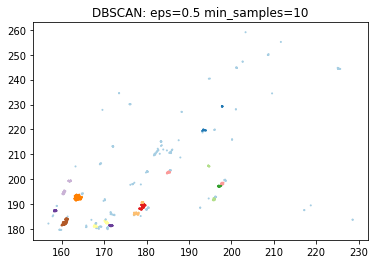

In [49]:
plt.scatter(ord_x,ord_y,c=y_pred, cmap='Paired',s=1)
plt.title("DBSCAN: eps="+str(eps)+" min_samples="+str(min_samples))

In [50]:
print(y_pred)
len(y_pred)

[-1 -1  0 ... 19 19 -1]


1244

In [51]:
cluster1=[[i,j] for k,i,j in zip(y_pred,ord_x,ord_y) if k==3]
len(cluster1)

13

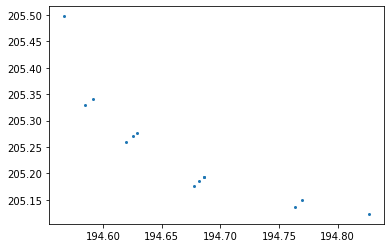

In [52]:
x=[x for x,y in cluster1]
y=[y for x,y in cluster1]
plt.scatter(x, y,s=4)

In [53]:
import sympy as sym

In [54]:
x1=sym.Symbol("x")
y1=sym.Symbol("y")
R=sym.Symbol("R")
Xc=sym.Symbol("Xc")
Yc=sym.Symbol("Yc")


In [57]:
f=((R**2-(Xc-x1)**2)**.5)+Yc
fn=sym.Matrix([f])
j1=fn.jacobian([Xc,Yc,R])


In [133]:
import numpy as np
Lbx=np.array([[i] for i in x])
Lby=np.array([[i] for i in y])
DX=np.array([[5],[5],[5]])
Xp=np.array([[200],[200],[500]])
count=1000
while np.amax(np.abs(DX))>10**-6 and count>0:
  count-=1
  J=[]
  for i in range(len(Lby)):
    J.append(j1.subs([(Xc,Xp[0][0]),(Yc,Xp[1][0]),(R,Xp[2][0]),(x1,Lbx[i][0])]))
  A=np.array(J)
  N=np.dot(np.transpose(A),A)
  U=np.dot(np.transpose(A),Lby)
  DX=np.dot(N,U)
  Xp=Xp+DX

In [134]:
DX

array([[5.31303525712731e-6],
       [69371.4640351200],
       [69371.4640351200]], dtype=object)

In [135]:
A

array([[2.33840363946321e-9, 1, 1.00000000000000],
       [1.42571803320830e-9, 1, 1.00000000000000],
       [1.51230235506756e-9, 1, 1.00000000000000],
       [1.84804845536514e-10, 1, 1.00000000000000],
       [2.53334726247600e-10, 1, 1.00000000000000],
       [3.11075836716657e-10, 1, 1.00000000000000],
       [3.07442929116588e-10, 1, 1.00000000000000],
       [-6.44874225885301e-10, 1, 1.00000000000000],
       [-5.18603234705158e-10, 1, 1.00000000000000],
       [-5.61922811626928e-10, 1, 1.00000000000000],
       [-1.40602356089084e-9, 1, 1.00000000000000],
       [-1.05610848643009e-9, 1, 1.00000000000000],
       [-1.14990350291559e-9, 1, 1.00000000000000]], dtype=object)

In [136]:
Xp

array([[194.664447763810],
       [69371679.5814174],
       [69371987.3555905]], dtype=object)